### evorca quickstart

In [1]:
# %pip install matplotlib
# %pip install --upgrade "jax[cpu]" jaxlib

In [2]:
from pathlib import Path
import sys, json
import numpy as np
import evorca as ev

In [5]:
# P02356, deep msa from alphafold3 server
msa_path = "./msas/fold_p02358_paired_msa_chains_a.a3m"
res = ev.fit(
    a3m=msa_path,
    seq_type='protein',  # or 'rna'
    dtype='bf16', # or 'fp32', 'fp16'
    msa_subsample=True, # reduce similar and gappy sequences
    apc=True, # apply average product correction
)
print('Keys:', list(res.keys()))
print('score shape:', res['score'].shape)

2025-09-15 17:31:12.947318: W external/xla/xla/service/platform_util.cc:220] unable to create StreamExecutor for CUDA:0: : CUDA_ERROR_OUT_OF_MEMORY: out of memory


Keys: ['meta', 'h', 'Jsym', 'score']
score shape: (135, 135)


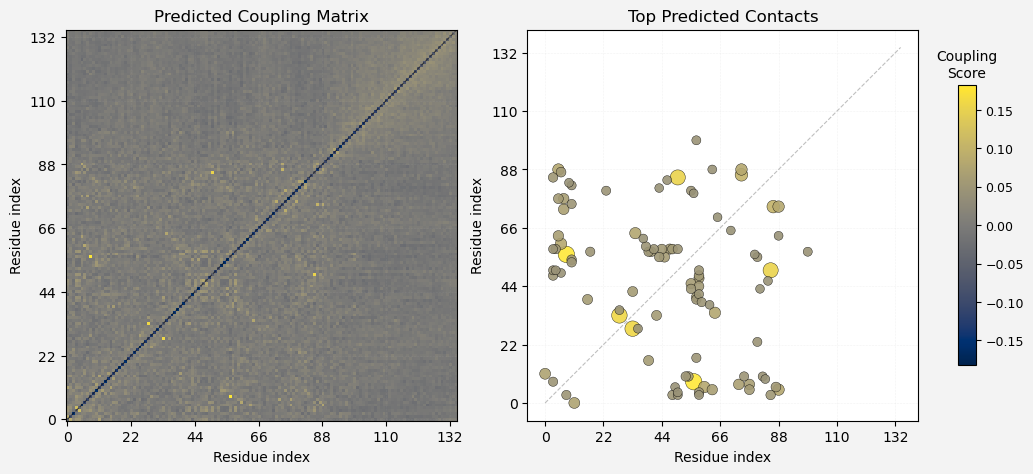

In [6]:
# visualize contact map
ev.visualize_array(res['score'], topk=50, seq_type='protein')